In [142]:
# Manejo de datos
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import xarray as xr
import os

# Representación espacial
import folium

# Predicción
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Las partículas PM2,5, por tanto, se pueden acumular en el sistema respiratorio y están asociadas, cada vez con mayor consistencia científica, con numerosos efectos negativos sobre la salud, como el aumento de las enfermedades respiratorias y la disminución del funcionamiento pulmonar. Los grupos más sensibles –niños, ancianos y personas con padecimientos respiratorios y cardiacos– corren más riesgo de padecer los efectos negativos de este contaminante.

In [143]:
car_bogota_lat = 4.665893604022635 
car_bogota_lng = -74.0948257324649
mapa = folium.Map(location = [car_bogota_lat, car_bogota_lng], zoom_start = 25)
folium.Marker(location = [car_bogota_lat, car_bogota_lng], popup = 'Centro de Alto Rendimiento').add_to(mapa)
mapa

<font style="color:red; font-size:2.5em">TALLER 3</font>

A partir de la siguiente información proporcionada, van a realizar un análisis exploratorio de los datos de PM2.5 registrados en la ciudad de Bogotá en diferentes años. Para ello puede guiarse de las demostraciones mostradas en las siguientes líneas de código o guiarse de los temas vistos en clases.

In [144]:
df = pd.read_csv("PM25.csv")
df.columns 

Index(['FECHA', 'BOLIVIA', 'BOSA', 'CARVAJAL', 'CENTRO DE ALTO RENDIMIENTO',
       'CIUDAD BOLIVAR', 'FONTIBON', 'GUAYMARAL', 'JAZMIN', 'KENNEDY',
       'LAS FERIAS', 'MIN AMBIENTE', 'PUENTE ARANDA', 'SAN CRISTOBAL', 'SUBA',
       'TUNAL', 'USAQUEN', 'USME'],
      dtype='object')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FECHA                       70128 non-null  object 
 1   BOLIVIA                     3222 non-null   float64
 2   BOSA                        1787 non-null   float64
 3   CARVAJAL                    57211 non-null  float64
 4   CENTRO DE ALTO RENDIMIENTO  58912 non-null  float64
 5   CIUDAD BOLIVAR              1812 non-null   float64
 6   FONTIBON                    17333 non-null  float64
 7   GUAYMARAL                   49951 non-null  float64
 8   JAZMIN                      2059 non-null   float64
 9   KENNEDY                     66564 non-null  float64
 10  LAS FERIAS                  53575 non-null  float64
 11  MIN AMBIENTE                54517 non-null  float64
 12  PUENTE ARANDA               32436 non-null  float64
 13  SAN CRISTOBAL               507

In [146]:
test2013 = df[df['FECHA'].str.contains('2013-')]

In [147]:
test2013[test2013.columns]

,FECHA,BOLIVIA,BOSA,CARVAJAL,CENTRO DE ALTO RENDIMIENTO,CIUDAD BOLIVAR,FONTIBON,GUAYMARAL,JAZMIN,KENNEDY,LAS FERIAS,MIN AMBIENTE,PUENTE ARANDA,SAN CRISTOBAL,SUBA,TUNAL,USAQUEN,USME
0,2013-01-01 00:00:00,NaN,NaN,NaN,17.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01 01:00:00,NaN,NaN,NaN,33.8,NaN,NaN,NaN,NaN,104.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01 02:00:00,NaN,NaN,NaN,20.2,NaN,NaN,NaN,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01 03:00:00,NaN,NaN,NaN,19.1,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01 04:00:00,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2013-12-31 19:00:00,NaN,NaN,16.5,6.6,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,2.7,NaN
8756,2013-12-31 20:00:00,NaN,NaN,15.2,13.5,NaN,NaN,NaN,NaN,15.3,NaN,NaN,NaN,NaN,NaN,NaN,3.8,NaN
8757,2013-12-31 21:00:00,NaN,NaN,21.3,11.0,NaN,NaN,NaN,NaN,27.5,NaN,NaN,NaN,NaN,NaN,NaN,4.1,NaN
8758,2013-12-31 22:00:00,NaN,NaN,22.7,6.3,NaN,NaN,NaN,NaN,30.0,6.7,NaN,NaN,NaN,NaN,NaN,3.1,NaN


In [148]:
'''
z = df[df['FECHA'].str.contains('2013-')]
z_mean = z['CENTRO DE ALTO RENDIMIENTO'].mean()
means.append(z_mean)
z = df[df['FECHA'].str.contains('2014-')]
z_mean = z['CENTRO DE ALTO RENDIMIENTO'].mean()
means.append(z_mean)
z = df[df['FECHA'].str.contains('2015-')]
z_mean = z['CENTRO DE ALTO RENDIMIENTO'].mean()
means.append(z_mean)
'''

"\nz = df[df['FECHA'].str.contains('2013-')]\nz_mean = z['CENTRO DE ALTO RENDIMIENTO'].mean()\nmeans.append(z_mean)\nz = df[df['FECHA'].str.contains('2014-')]\nz_mean = z['CENTRO DE ALTO RENDIMIENTO'].mean()\nmeans.append(z_mean)\nz = df[df['FECHA'].str.contains('2015-')]\nz_mean = z['CENTRO DE ALTO RENDIMIENTO'].mean()\nmeans.append(z_mean)\n"

In [149]:
means = []
years = ['2013-', '2014-', '2015-']

for year in years:
    z = df[df['FECHA'].str.contains(year)]
    z_mean = z['CENTRO DE ALTO RENDIMIENTO'].mean()
    means.append(z_mean)

In [150]:
means

[19.59083595662817, 21.495681112261376, 17.339127694441025]

In [151]:
sta_means = []
z = df[df['FECHA'].str.contains('2013-')]
sta_means.append(z[z.columns[1]].mean())
sta_means.append(z[z.columns[2]].mean())
sta_means.append(z[z.columns[3]].mean())
sta_means.append(z[z.columns[4]].mean())

sta_means

[nan, nan, 29.444439636520958, 19.59083595662817]

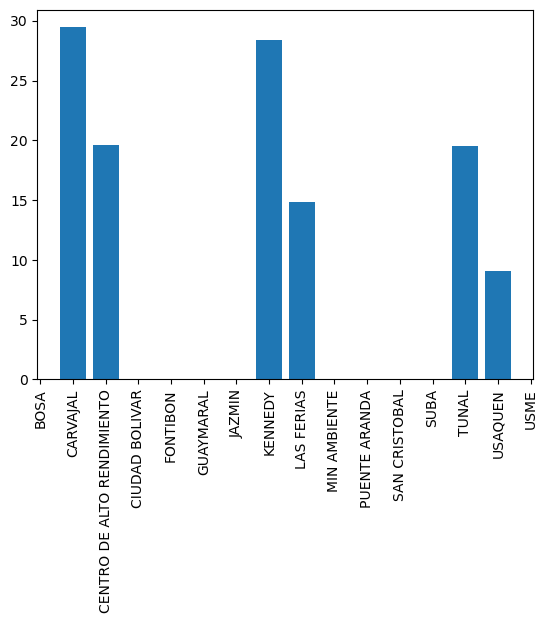

In [152]:
sta_means = []

for i in df.columns[1:]:
    z = df[df['FECHA'].str.contains('2013-')]
    zl = z[i].mean()
    sta_means.append(zl)
    
plt.bar(df.columns[1:],sta_means)
plt.xticks(rotation = 90)
plt.show()

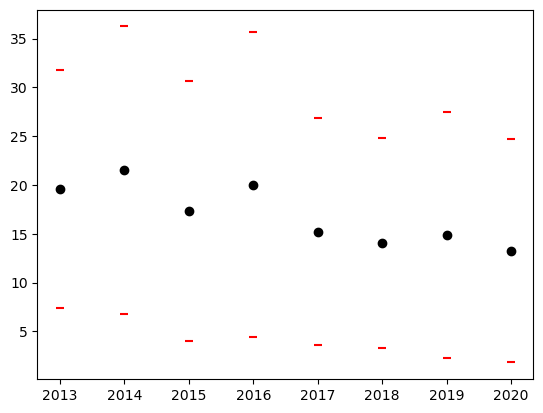

In [153]:
# ¿Qué pasa si queremos una estación con todos los años (Centro de alto rendimiento)?

years = np.arange(2013,2021)
year_mean = []
year_std = []

for year in years:
    z = df[df['FECHA'].str.contains(str(year)+'-')]
    zl = z['CENTRO DE ALTO RENDIMIENTO'].mean()
    zs = z['CENTRO DE ALTO RENDIMIENTO'].std()
    year_mean.append(zl)
    year_std.append(zs)
    
plt.scatter(years, year_mean, color = 'k')
plt.scatter(years, np.array(year_mean) + year_std, color = 'r', marker = '_')
plt.scatter(years, np.array(year_mean) - year_std, color = 'r', marker = '_')

<img src="Noticias.JPG">

In [154]:
mat_me = np.ones([17,8])
years = np.arange(2013,2021)

for i, year in enumerate(years):
    z = df[df['FECHA'].str.contains(str(year)+'-')]
    for j,sta in enumerate(df.columns[1:]):
        zl = z[sta].mean()
        mat_me[j,i] = zl

In [155]:
import matplotlib.gridspec as gridspec
from pylab import* # matrices de graficas!!!

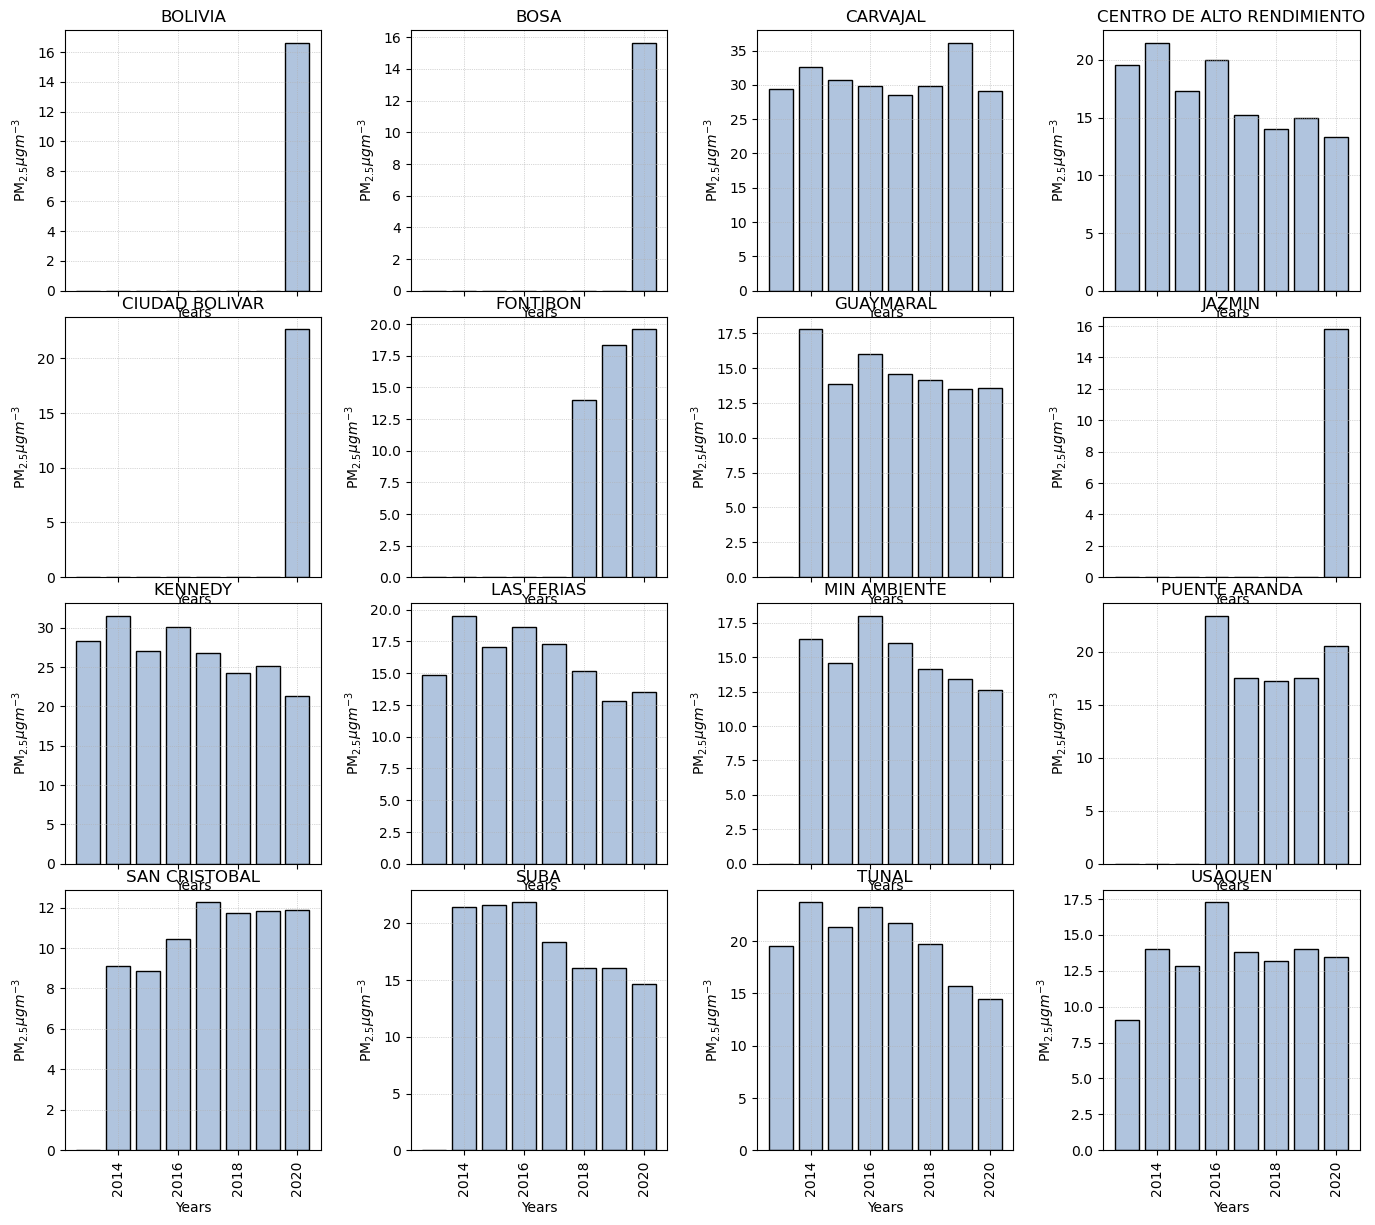

In [156]:
fig = plt.figure(figsize=(14,14))
gs = gridspec.GridSpec(4,4, left=0.05, right=0.975, hspace=0.1, wspace=0.35, top=0.9, bottom=0.1)
Nombres = df.columns[1:]
for i in range (16):   
    ax = subplot (gs[i])
    plt.xlabel("Years")
    plt.xticks(rotation=90)
    plt.grid(linestyle=":",linewidth=0.5)
    plt.ylabel("PM$_{2.5}$$\mu g $$m^{-3}$")
    plt.title(Nombres[i])
    plt.bar(years,np.nan_to_num(mat_me[i,:]), color = 'lightsteelblue', edgecolor ='k')
    if i<12:
        ax.xaxis.set_major_formatter(NullFormatter())

In [157]:
df["FECHA"] = pd.to_datetime(df["FECHA"])
df.insert(1,"Anio",df.FECHA.dt.year)
df.insert(2,"mes",df.FECHA.dt.month)
df.insert(3,"day",df.FECHA.dt.day)
df.head(2)

,FECHA,Anio,mes,day,BOLIVIA,BOSA,CARVAJAL,CENTRO DE ALTO RENDIMIENTO,CIUDAD BOLIVAR,FONTIBON,...,JAZMIN,KENNEDY,LAS FERIAS,MIN AMBIENTE,PUENTE ARANDA,SAN CRISTOBAL,SUBA,TUNAL,USAQUEN,USME
0,2013-01-01 00:00:00,2013,1,1,NaN,NaN,NaN,17.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01 01:00:00,2013,1,1,NaN,NaN,NaN,33.8,NaN,NaN,...,NaN,104.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


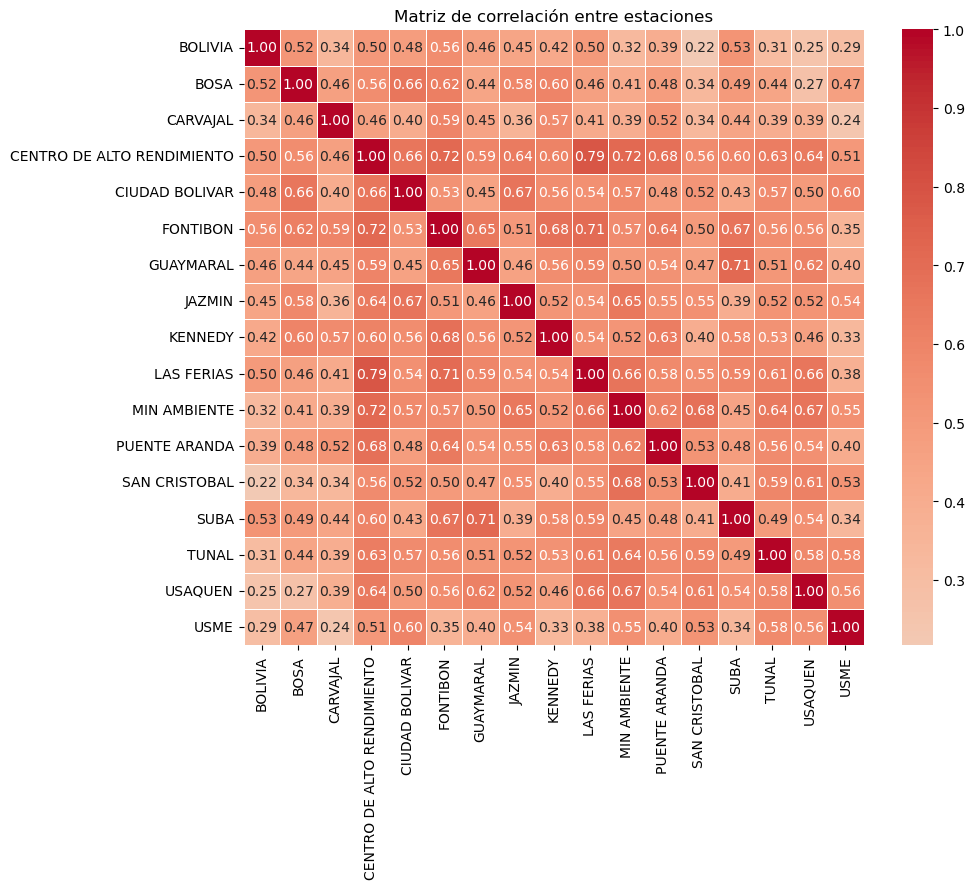

In [158]:
columns = df.columns[4:]
df_corr = df[columns]
correlation_matrix = df_corr.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center = 0, fmt = ".2f", linewidths = 0.5)
plt.title('Matriz de correlación entre estaciones')
plt.show()

In [159]:
# Para bosa > Ciudad bolivar, Fontibon, Kennedy

mean_ciudadbolivar = df['CIUDAD BOLIVAR'].median()
mean_fontibon = df['FONTIBON'].median()
mean_kennedy = df['KENNEDY'].median()

print(mean_ciudadbolivar)
print(mean_fontibon)
print(mean_kennedy)

20.9
16.1
23.3


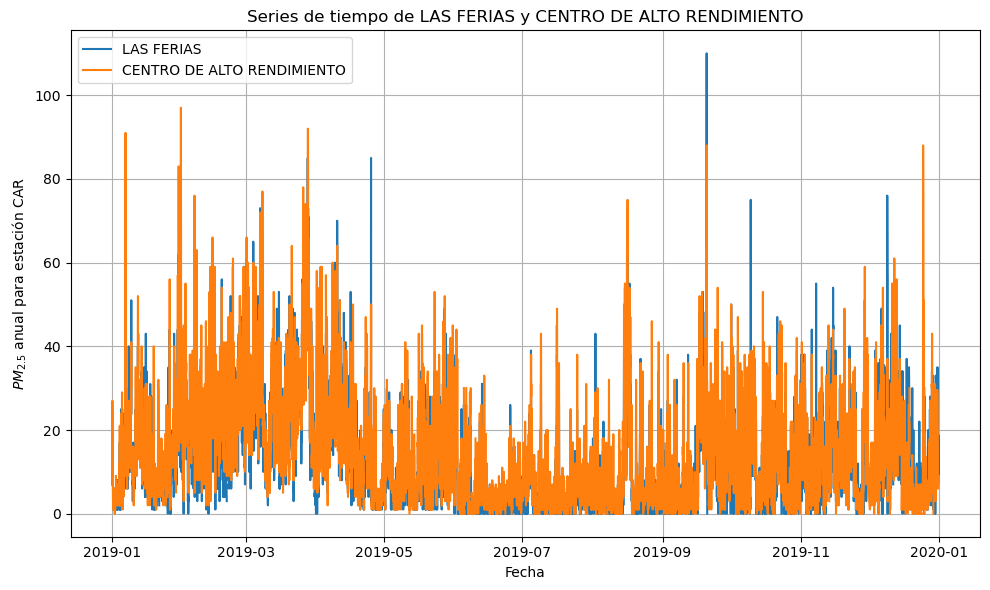

In [160]:
df['FECHA'] = pd.to_datetime(df['FECHA']) 

data_date = df.loc[df['FECHA'].dt.year == 2019]

estaciones_seleccionadas = ['LAS FERIAS', 'CENTRO DE ALTO RENDIMIENTO']

plt.figure(figsize = (10, 6))

for estacion in estaciones_seleccionadas:
    plt.plot(data_date['FECHA'], data_date[estacion], label = estacion)

plt.xlabel('Fecha')
plt.ylabel("$PM_{2.5}$ anual para estación CAR")
plt.title('Series de tiempo de {} y {}'.format(estaciones_seleccionadas[0], estaciones_seleccionadas[1]))
plt.legend(loc = 'upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [161]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

stations = ['CENTRO DE ALTO RENDIMIENTO', 'KENNEDY', 'CARVAJAL']

for station in stations:
    df.dropna(subset = [station], inplace = True)

    X = df[['Anio', 'mes']]
    y = df[station]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1000000)

    # Lista de modelos a probar
    modelos = [
        LinearRegression(),
        RandomForestRegressor(),
        KNeighborsRegressor()
    ]
    print('Estación: {}'.format(station))

    for modelo in modelos:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f"Modelo: {modelo.__class__.__name__}, R2: {r2}")


Estación: CENTRO DE ALTO RENDIMIENTO
Modelo: LinearRegression, R2: 0.06290827218439587
Modelo: RandomForestRegressor, R2: 0.2574066424406666
Modelo: KNeighborsRegressor, R2: 0.12204208280671769
Estación: KENNEDY
Modelo: LinearRegression, R2: 0.04973193921409724
Modelo: RandomForestRegressor, R2: 0.15677819678626492
Modelo: KNeighborsRegressor, R2: 0.026426716146848772
Estación: CARVAJAL
Modelo: LinearRegression, R2: 0.00020738073511950006
Modelo: RandomForestRegressor, R2: 0.14705152875132443
Modelo: KNeighborsRegressor, R2: -0.06859812291184775


In [162]:
df_car = pd.read_csv("PM25_CAR.csv", sep = ';')
df_car = df_car[df_car['FECHA'].str.contains('/12/2020')]
df_car = df_car.set_index('FECHA')
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 1/12/2020 0:00 to 31/12/2020 23:00
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CENTRO DE ALTO RENDIMIENTO  730 non-null    float64
dtypes: float64(1)
memory usage: 11.6+ KB


In [163]:
df_car = df_car.fillna(method = 'ffill') # Valor previo
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 1/12/2020 0:00 to 31/12/2020 23:00
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CENTRO DE ALTO RENDIMIENTO  744 non-null    float64
dtypes: float64(1)
memory usage: 11.6+ KB


In [164]:
df_car.describe()

,CENTRO DE ALTO RENDIMIENTO
count,744.000000
mean,14.285618
std,9.784089
min,0.000000
25%,7.000000
50%,12.500000
75%,20.000000
max,78.000000


In [165]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_car)

num_features = df_scaled.shape[1]

In [166]:
sequence_length = 10  # Longitud de la secuencia para las últimas 10 horas
sequences = []
target = []

for i in range(len(df_scaled) - sequence_length):
    seq = df_scaled[i:i + sequence_length]
    label = df_scaled[i + sequence_length]
    sequences.append(seq)
    target.append(label)

In [167]:
sequences = np.array(sequences)
target = np.array(target)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(sequences, target, test_size = 0.2, random_state = 42)

# Construir el modelo de RNN
model = Sequential()
model.add(LSTM(64, input_shape = (sequence_length, num_features), return_sequences = True))
model.add(LSTM(32, return_sequences = False))
model.add(Dense(num_features))  # Ajustar el número de neuronas según tus necesidades

In [169]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 500, batch_size = 32, validation_data=(X_test, y_test))

# Realizar predicciones
last_sequence = X_test[-1]
predicted = []

for _ in range(len(y_test)):
    pred = model.predict(np.array([last_sequence]))[0]
    predicted.append(pred)
    last_sequence = np.concatenate((last_sequence[1:], [pred]), axis = 0)

predicted = np.array(predicted)
predicted = scaler.inverse_transform(predicted)  # Revertir la escala

# Calcular el error de predicción (puedes usar cualquier métrica de tu elección)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(scaler.inverse_transform(y_test), predicted)
print(f"Mean Squared Error: {mse}")

Epoch 1/500
19/19 [==============================] - 7s 114ms/step - loss: 0.0199 - val_loss: 0.0133
Epoch 2/500
19/19 [==============================] - 1s 53ms/step - loss: 0.0133 - val_loss: 0.0121
Epoch 3/500
19/19 [==============================] - 1s 56ms/step - loss: 0.0125 - val_loss: 0.0120
Epoch 4/500
19/19 [==============================] - 1s 55ms/step - loss: 0.0124 - val_loss: 0.0127
Epoch 5/500
19/19 [==============================] - 1s 53ms/step - loss: 0.0125 - val_loss: 0.0111
Epoch 6/500
19/19 [==============================] - 1s 54ms/step - loss: 0.0117 - val_loss: 0.0111
Epoch 7/500
19/19 [==============================] - 1s 53ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 8/500
19/19 [==============================] - 1s 53ms/step - loss: 0.0117 - val_loss: 0.0101
Epoch 9/500
19/19 [==============================] - 1s 54ms/step - loss: 0.0115 - val_loss: 0.0101
Epoch 10/500
19/19 [==============================] - 1s 53ms/step - loss: 0.0110 - val_loss: 0.010

In [ ]:
predictions

,CENTRO DE ALTO RENDIMIENTO
FECHA,
27/05/2019 16:00,8.853167
27/05/2019 17:00,8.464073
27/05/2019 18:00,8.104672
27/05/2019 19:00,7.851568
27/05/2019 20:00,7.769229
...,...
31/12/2020 19:00,34.418583
31/12/2020 20:00,34.418583
31/12/2020 21:00,34.418583


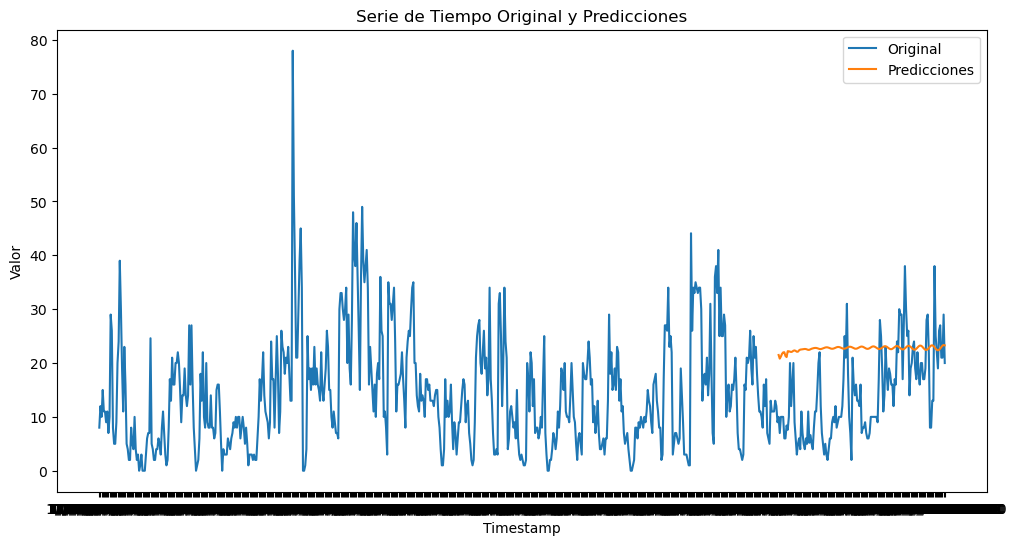

In [ ]:
predictions = pd.DataFrame(predicted, columns = df_car.columns, index = df_car.index[-len(y_test):])

# Graficar la serie de tiempo original y las predicciones
plt.figure(figsize = (12, 6))
plt.plot(df_car.index, df_car['CENTRO DE ALTO RENDIMIENTO'], label = 'Original')
plt.plot(predictions.index, predictions['CENTRO DE ALTO RENDIMIENTO'], label = 'Predicciones')
plt.xlabel('Timestamp')
plt.ylabel('Valor')
plt.title('Serie de Tiempo Original y Predicciones')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Eliminar filas con valores faltantes en la columna 'estacion_A'
df.dropna(subset=['CENTRO DE ALTO RENDIMIENTO'], inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['Anio', 'mes']]
y = df['CENTRO DE ALTO RENDIMIENTO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Lista de modelos a probar junto con sus respectivos rangos de hiperparámetros
modelos = [
    (LinearRegression(), {}),
    (RandomForestRegressor(), {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    })
]

# Realizar búsqueda aleatoria para cada modelo
for modelo, param_dist in modelos:
    random_search = RandomizedSearchCV(estimator = modelo, param_distributions = param_dist, n_iter = 10, scoring = 'neg_mean_squared_error', cv = 5, random_state = 100)
    random_search.fit(X_train, y_train)
    
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Modelo: {best_model.__class__.__name__}")
    print(f"Mejores hiperparámetros: {random_search.best_params_}")
    print(f"Error cuadrático medio: {mse}\n")

In [ ]:
'''
Modelo: LinearRegression
Mejores hiperparámetros: {}
Error cuadrático medio: 161.92018521729656

Modelo: RandomForestRegressor
Mejores hiperparámetros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None}
Error cuadrático medio: 126.27907273946158
'''

"\nModelo: LinearRegression\nMejores hiperparámetros: {}\nError cuadrático medio: 161.92018521729656\n\nModelo: RandomForestRegressor\nMejores hiperparámetros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None}\nError cuadrático medio: 126.27907273946158\n"

In [ ]:
sns.boxplot(x = 'Anio', y = 'CENTRO DE ALTO RENDIMIENTO', data = df)
plt.ylabel("$PM_{2.5}$ anual para estación CAR")
plt.xlabel("Meses")
plt.show()